In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from collections import Counter

In [21]:
data=pd.read_csv("./dataset.csv")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [23]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [24]:
data_clean = data.drop_duplicates(subset="track_id", keep='first', inplace=False)

In [25]:
data_drop = data_clean.drop(['track_id', 'Unnamed: 0','time_signature', 'key', 'mode'], axis=1)

data_drop.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,-8.807,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,acoustic
6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,acoustic
7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,-9.331,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,acoustic
8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,-8.700,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,acoustic
9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,-6.770,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,acoustic


In [26]:
data_p = data_drop.sort_values("popularity", ascending=False)

data_p.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,-7.375,0.0864,0.01300,0.000005,0.2660,0.238,131.121,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,-5.548,0.0440,0.01250,0.033000,0.2300,0.550,128.033,hip-hop
67356,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,-5.329,0.0364,0.58300,0.000002,0.2180,0.850,124.980,latin
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,dance
67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,-5.105,0.0817,0.09010,0.000027,0.0933,0.425,92.005,latin
67359,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,-5.198,0.2530,0.09930,0.000291,0.1260,0.187,106.672,latin
67559,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,-8.797,0.0516,0.14100,0.000017,0.0639,0.234,98.047,latin
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,piano
20000,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,-5.529,0.0427,0.06350,0.000001,0.1050,0.310,116.992,dance
67500,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,-5.745,0.0413,0.08000,0.000001,0.5280,0.268,79.928,latin


In [10]:
#Parametry statystytczne: średnia, mediana, odchylenie...
#Shape of the dataset
rows, columns = data_p.shape
size = data_p.size
print(f'Dataset shape is {rows} rows x {columns} columns - {size} elements in total')

Dataset shape is 89741 rows x 16 columns - 1435856 elements in total


In [28]:
df = pd.DataFrame(data_p)

# Obliczanie statystyk
statistics = df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].describe()

statistics

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,89741.000000,8.974100e+04,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000
mean,33.198438,2.291418e+05,0.562166,0.634458,-8.499004,0.087442,0.328289,0.173413,0.216970,0.469477,122.058316
std,20.580824,1.129477e+05,0.176691,0.256605,5.221490,0.113277,0.338321,0.323848,0.194884,0.262864,30.117532
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.730400e+05,0.450000,0.457000,-10.322000,0.036000,0.017100,0.000000,0.098200,0.249000,99.264000
50%,33.000000,2.132930e+05,0.576000,0.676000,-7.185000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000
75%,49.000000,2.642930e+05,0.692000,0.853000,-5.108000,0.085900,0.625000,0.097600,0.279000,0.682000,140.077000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


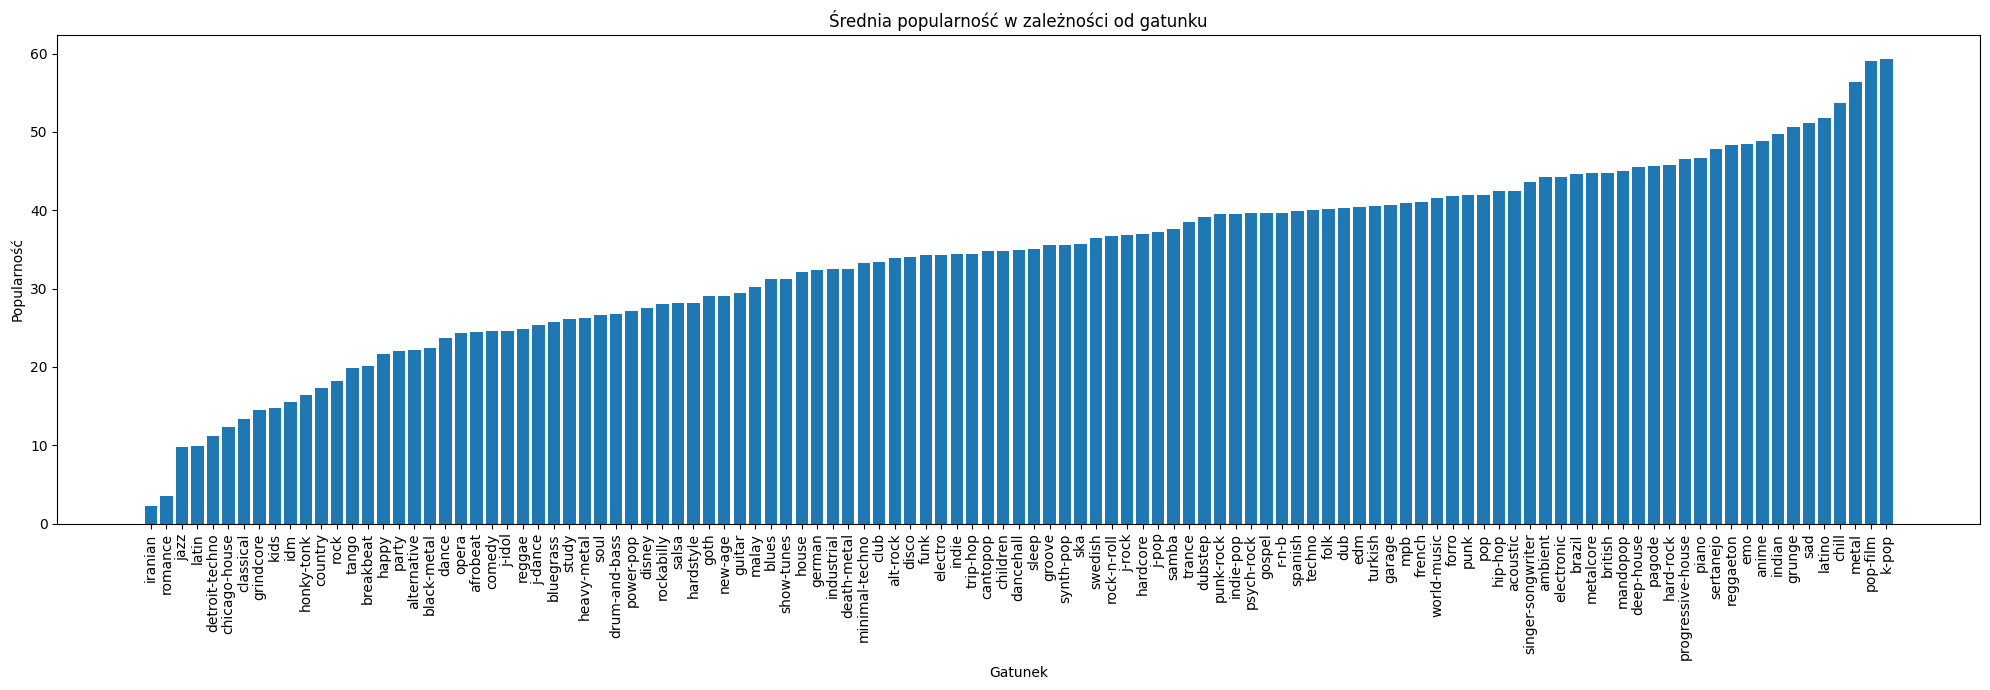

In [11]:
#Wykres popularności względem gatunku

df = pd.DataFrame(data_p)

# Grupowanie danych po gatunku i obliczanie średniej popularności
genre_popularity = df.groupby('track_genre')['popularity'].mean()

# Sortowanie danych popularności
sorted_genre_popularity = genre_popularity.sort_values()

# Tworzenie wykresu
plt.figure(figsize=(20, 7))
plt.bar(sorted_genre_popularity.index, sorted_genre_popularity.values)
plt.xlabel('Gatunek')
plt.ylabel('Popularność')
plt.title('Średnia popularność w zależności od gatunku')
plt.xticks(rotation=90)
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

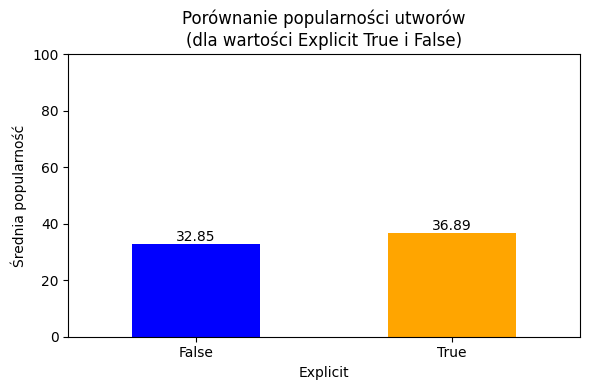

In [13]:
#W zależności od wartości explicit
df = pd.DataFrame(data_p)

# Grupowanie danych po wartości explicit i obliczanie średniej popularności
explicit_popularity = df.groupby('explicit')['popularity'].mean()

# Tworzenie wykresu
plt.figure(figsize=(6, 4))
colors = ['blue', 'orange']  # Kolory dla False i True
explicit_popularity.plot(kind='bar', color=colors)
plt.xlabel('Explicit')
plt.ylabel('Średnia popularność')
plt.title('Porównanie popularności utworów\n(dla wartości Explicit True i False)')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.ylim(0, 100)  # Ustalenie zakresu osi Y
plt.tight_layout()

# Dodanie etykiet do słupków
for i, value in enumerate(explicit_popularity):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Wyświetlanie wykresu
plt.show()

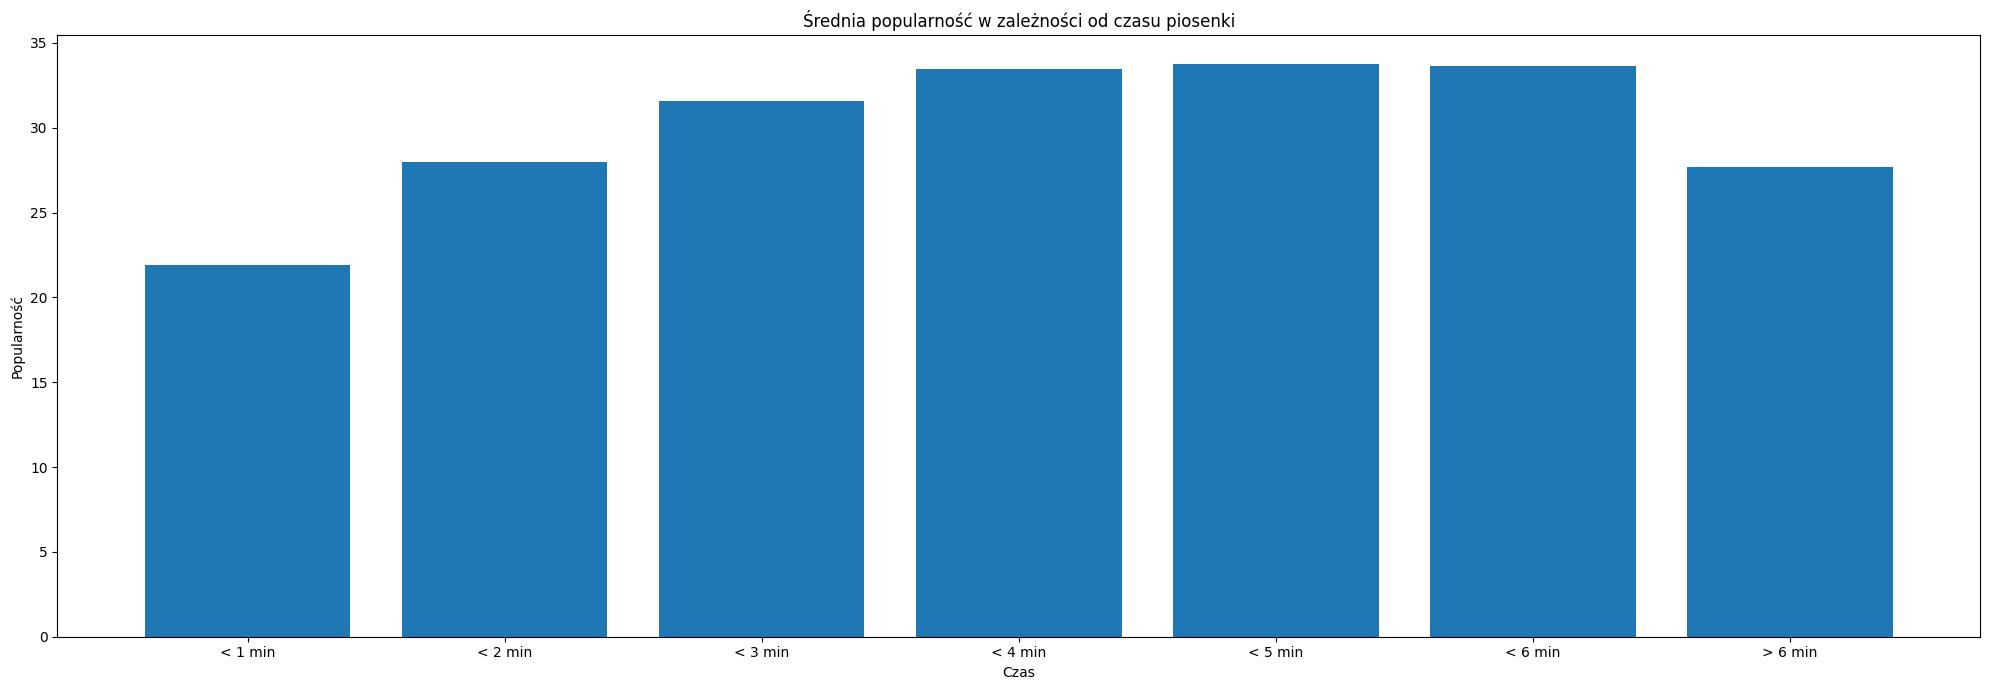

In [14]:
def get_average(sign, shorter_than_minutes):
  longer_than = (shorter_than_minutes * 1000 * 60)
  song_range = df.query(f'duration_ms {sign} {longer_than}')
  average = song_range['popularity'].mean()
  return average

popularity_per_length = []

for i in range(1, 7):
  popularity_per_length.append(get_average('<', i))
popularity_per_length.append(get_average('>', 6))

plt.figure(figsize=(20, 7))
length_bar = ['< 1 min', '< 2 min', '< 3 min', '< 4 min', '< 5 min', '< 6 min', '> 6 min']
plt.bar(length_bar, popularity_per_length)
plt.xlabel('Czas')
plt.ylabel('Popularność')
plt.title('Średnia popularność w zależności od czasu piosenki')
plt.tight_layout()

plt.show()

In [15]:
#7.Trenowanie modelu: Przewidywanie popularności piosenki(idealne parametry) sckit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dataset.csv')

df['track_genre'] = df['track_genre'].astype('category').cat.codes

features = [
  'duration_ms',
  'explicit',
  'danceability',
  'energy',
  'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'time_signature',
  'track_genre'
]

X = df[features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#8.Zastosowanie alternatywnych klasyfikatorów i parametrów (fine tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}

grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Mean Squared Error: 481.91685158539104


C:\Users\marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [16]:
#Statystyki najpopularniejszych artystów(pogrupować piosenki wg artystów, wyciągnąć uśrednione statystki piosenek, porównanie do najpopularniejszej wg artysty)

df = pd.DataFrame(data_p)

# Wyczyszczenie tabeli z null
df_cleaned = df.dropna()

# Wypisanie najczęściej pojawiających się artystów
top_artists = df_cleaned['artists'].str.split(';', expand=True).stack().value_counts()

# Obliczanie średnich statystyk dla artystów
artist_stats = df_cleaned.groupby('artists').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
})

# Połączenie najczęściej pojawiających się artystów i ich średnich statystyk
result = pd.concat([top_artists, artist_stats], axis=1)
result.columns = ['Count', 'Avg Popularity', 'Avg Danceability', 'Avg Energy', 'Avg Loudness', 'Avg Speechiness', 
                'Avg Acousticness', 'Avg Instrumentalness', 'Avg Liveness', 'Avg Valence', 'Avg Tempo']

# Dodanie kolumny z najczęściej występującym gatunkiem
df_cleaned['track_genre'] = df_cleaned['track_genre'].str.split(';')
most_frequent_genre = df_cleaned.groupby('artists')['track_genre'].apply(lambda x: x.mode()[0])
result['Most Frequent Genre'] = most_frequent_genre

result_clean = result.dropna()
result_clean.head(20)

C:\Users\marco\AppData\Local\Temp\ipykernel_2244\3929531986.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['track_genre'] = df_cleaned['track_genre'].str.split(';')


,Count,Avg Popularity,Avg Danceability,Avg Energy,Avg Loudness,Avg Speechiness,Avg Acousticness,Avg Instrumentalness,Avg Liveness,Avg Valence,Avg Tempo,Most Frequent Genre
George Jones,332.0,16.561538,0.541135,0.357119,-12.482242,0.034684,0.686565,0.003545,0.178243,0.563027,108.917477,[honky-tonk]
Pritam,323.0,43.000000,0.524000,0.482000,-11.685000,0.030200,0.792000,0.496000,0.162000,0.419000,124.977000,[indian]
Wolfgang Amadeus Mozart,305.0,35.000000,0.614000,0.276000,-13.025000,0.051100,0.838000,0.000003,0.092100,0.649000,111.817000,[classical]
Arijit Singh,259.0,60.214286,0.519500,0.557905,-6.679714,0.036800,0.474748,0.001111,0.183969,0.365643,108.859167,[pop-film]
Hank Williams,243.0,13.455882,0.551654,0.283596,-12.204176,0.044250,0.903426,0.009945,0.289184,0.607860,119.676309,[honky-tonk]
my little airport,171.0,33.216374,0.542895,0.453694,-11.454287,0.044958,0.475044,0.064761,0.298754,0.498996,122.309520,[cantopop]
Glee Cast,170.0,38.841727,0.548115,0.667245,-6.108777,0.055550,0.276201,0.001640,0.222257,0.470105,122.547899,[club]
Yuvan Shankar Raja,167.0,51.843750,0.698844,0.591437,-7.203125,0.053275,0.363766,0.033581,0.157078,0.475719,121.734156,[k-pop]
Hillsong Worship,167.0,44.153846,0.381590,0.544064,-7.846179,0.033779,0.190478,0.000632,0.330962,0.188753,124.821679,[world-music]
BTS,165.0,67.888112,0.618734,0.764650,-4.753937,0.113436,0.091474,0.000058,0.193406,0.520315,123.137154,[k-pop]


In [17]:
df = pd.DataFrame(data_p)

# Wyczyszczenie tabeli z null
df_cleaned = df.dropna()

# Wypisanie najczęściej pojawiających się artystów
top_artists = df_cleaned['artists'].str.split(';', expand=True).stack().value_counts()

# Obliczanie średnich statystyk dla artystów
artist_stats = df_cleaned.groupby('artists').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean'
})

# Połączenie najczęściej pojawiających się artystów i ich średnich statystyk
result = pd.concat([top_artists, artist_stats], axis=1)
result.columns = ['Count', 'Avg Popularity', 'Avg Danceability', 'Avg Energy', 'Avg Loudness', 'Avg Speechiness', 
                  'Avg Acousticness', 'Avg Instrumentalness', 'Avg Liveness', 'Avg Valence', 'Avg Tempo']

# Dodanie kolumny z najczęściej występującym gatunkiem
df_cleaned['track_genre'] = df_cleaned['track_genre'].str.split(';')
most_frequent_genre = df_cleaned.groupby('artists')['track_genre'].apply(lambda x: x.mode()[0])
result['Most Frequent Genre'] = most_frequent_genre

# Sortowanie wyników według popularności
result = result.sort_values(by='Avg Popularity', ascending=False)

# Wyświetlenie wyników
result_clean = result.dropna()
result_clean.head(20)

# TODO error

C:\Users\marco\AppData\Local\Temp\ipykernel_2244\3476782665.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['track_genre'] = df_cleaned['track_genre'].str.split(';')


,Count,Avg Popularity,Avg Danceability,Avg Energy,Avg Loudness,Avg Speechiness,Avg Acousticness,Avg Instrumentalness,Avg Liveness,Avg Valence,Avg Tempo,Most Frequent Genre
Manuel Turizo,10.0,98.000000,0.835000,0.679000,-5.329000,0.036400,0.583000,0.000002,0.218000,0.850000,124.980000,[latin]
Joji,4.0,94.000000,0.440000,0.317000,-9.258000,0.053100,0.891000,0.000005,0.141000,0.268000,169.914000,[pop]
Beyoncé,3.0,93.000000,0.780000,0.689000,-5.668000,0.141000,0.036800,0.000010,0.069800,0.642000,115.042000,[dance]
Harry Styles,3.0,92.000000,0.529333,0.759333,-4.961667,0.052633,0.268667,0.000673,0.319000,0.627000,147.750000,[pop]
Luar La L,1.0,91.000000,0.704000,0.756000,-4.948000,0.448000,0.298000,0.000004,0.085200,0.461000,121.737000,[latin]
Ruth B.,2.0,90.000000,0.609000,0.692000,-2.958000,0.025900,0.015700,0.000000,0.086400,0.454000,116.959000,[pop]
Beach Weather,1.0,90.000000,0.572000,0.839000,-5.083000,0.037700,0.013000,0.009760,0.522000,0.465000,143.969000,[rock]
Elley Duhé,13.0,90.000000,0.410000,0.611000,-8.271000,0.046700,0.022800,0.000000,0.116000,0.089900,185.727000,[pop]
J. Cole,4.0,88.000000,0.690000,0.521000,-8.492000,0.339000,0.324000,0.000000,0.053400,0.494000,100.028000,[hip-hop]
Nicki Minaj,19.0,87.500000,0.950500,0.884500,-2.609000,0.226000,0.057700,0.000017,0.315000,0.917500,133.012000,[dance]


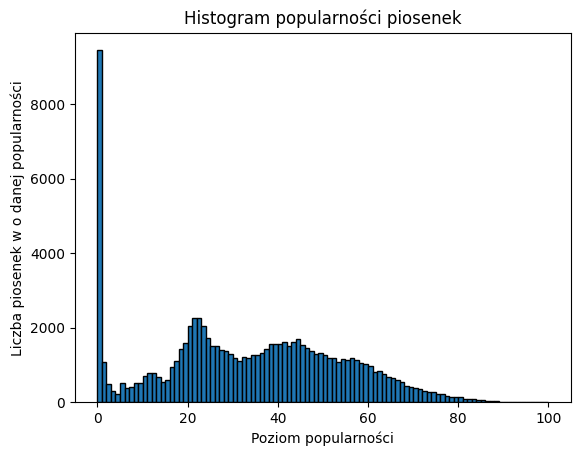

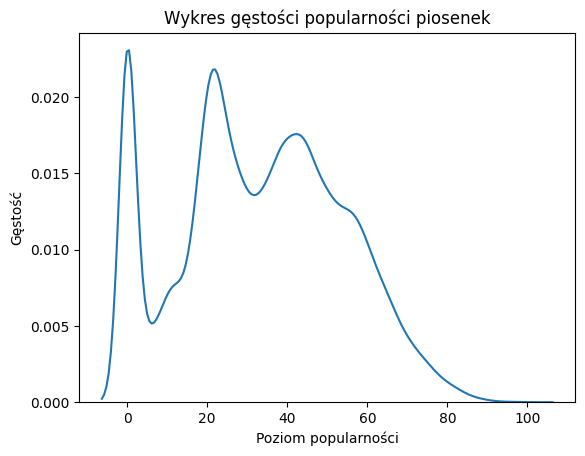

Skośność: 0.07086752749147761
Kurtoza: -0.7706698513785089


In [29]:
#Analiza rozkładu danych: histogram, wykresy gęstości, skośność i kurtoza


df = pd.DataFrame(data_p)
column_to_analyze = df['popularity']

plt.hist(column_to_analyze, bins=100, edgecolor='black')
plt.xlabel('Poziom popularności')
plt.ylabel('Liczba piosenek w o danej popularności')
plt.title('Histogram popularności piosenek')
plt.show()

sns.kdeplot(column_to_analyze)
plt.xlabel('Poziom popularności')
plt.ylabel('Gęstość')
plt.title('Wykres gęstości popularności piosenek')
plt.show()

skewness = column_to_analyze.skew()
print("Skośność:", skewness)
kurtosis = column_to_analyze.kurtosis()
print("Kurtoza:", kurtosis)



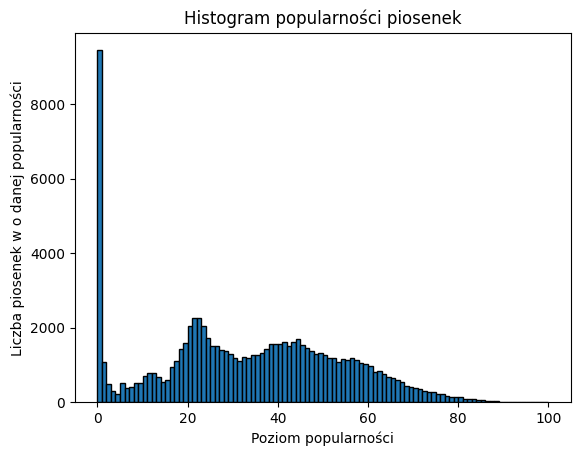

In [30]:

df = pd.DataFrame(data_p)
column_to_analyze = df['popularity']

plt.hist(column_to_analyze, bins=100, edgecolor='black')
plt.xlabel('Poziom popularności')
plt.ylabel('Liczba piosenek w o danej popularności')
plt.title('Histogram popularności piosenek')
plt.show()



                  Unnamed: 0  track_id   artists  album_name  track_name   
Unnamed: 0          1.000000 -0.003862 -0.008469    0.003695    0.001842  \
track_id           -0.003862  1.000000  0.003174    0.007128    0.005552   
artists            -0.008469  0.003174  1.000000    0.090199    0.038962   
album_name          0.003695  0.007128  0.090199    1.000000    0.303324   
track_name          0.001842  0.005552  0.038962    0.303324    1.000000   
popularity          0.032142  0.003243  0.003658    0.042522    0.011957   
duration_ms        -0.032743 -0.002948 -0.021542    0.006724    0.004188   
explicit           -0.054736  0.004163 -0.004672    0.000375   -0.005842   
danceability        0.003444 -0.000227 -0.009920   -0.019160   -0.020861   
energy             -0.055994 -0.000496 -0.005578   -0.044727   -0.039638   
key                -0.005520 -0.003049  0.006612   -0.006893   -0.003916   
loudness           -0.027307  0.001659 -0.018842   -0.032238   -0.012521   
mode        

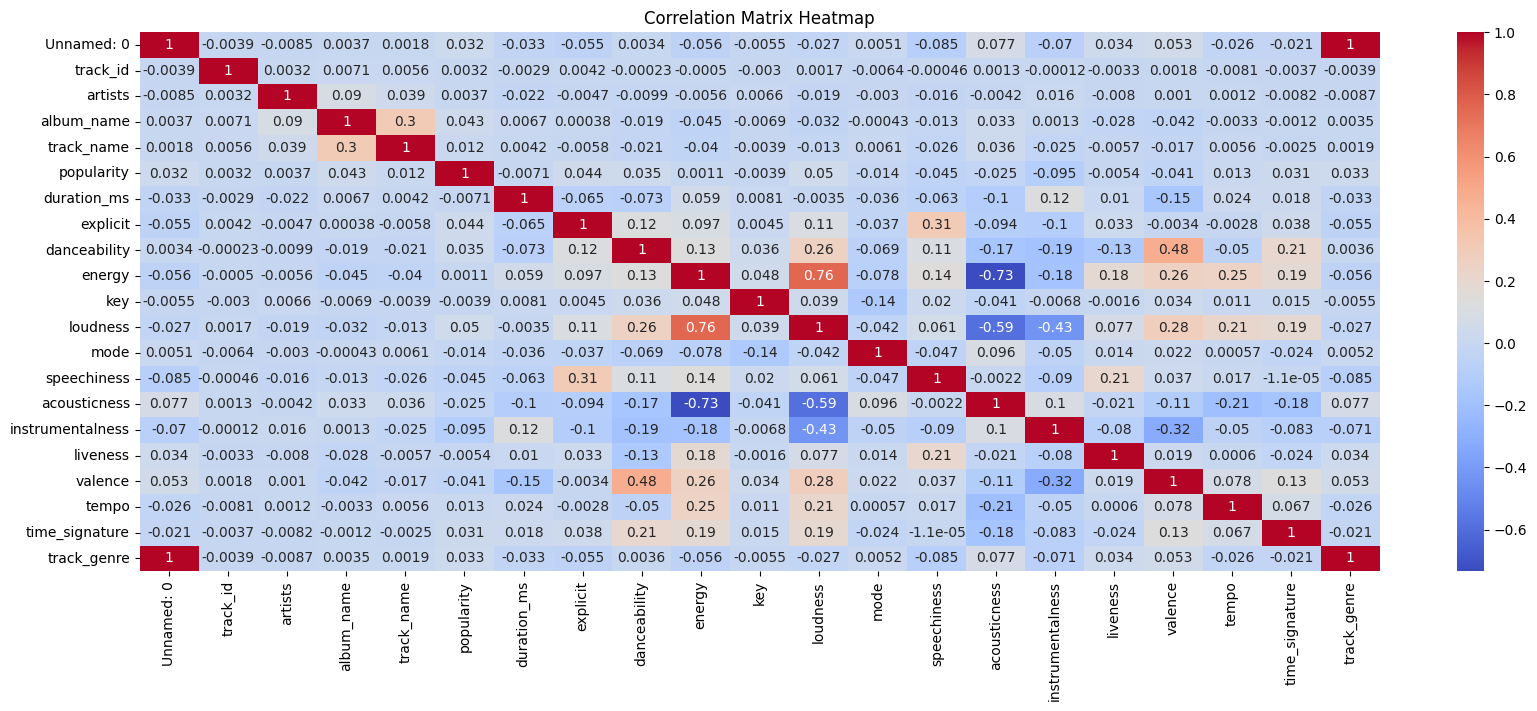

In [33]:
#Macierz korelacji:

#Obliczenie macierzy korelacji między zmiennymi
df = pd.read_csv('dataset.csv')

df['track_id'] = df['track_id'].astype('category').cat.codes
df['artists'] = df['artists'].astype('category').cat.codes
df['album_name'] = df['album_name'].astype('category').cat.codes
df['track_name'] = df['track_name'].astype('category').cat.codes
df['track_genre'] = df['track_genre'].astype('category').cat.codes

correlation_matrix = df.corr()

print(correlation_matrix)
#Wygenerowanie wykresu korelacji (np. heatmapy)

plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')
plt.show()


In [25]:
#Normalizacja tekstu: najpopularniejsze słowa z tytłów piosenek

# TODO

def find_most_common_word(song_titles):
    # Konwersja listy tytułów na obiekt typu DataFrame
    df = pd.DataFrame(song_titles, columns=['title'])

    # Podział tytułów na słowa przy użyciu funkcji split z biblioteki NumPy
    words = np.hstack(df['title'].str.split().values)

    # Obliczenie wystąpień słów przy użyciu funkcji unique i return_counts z biblioteki NumPy
    unique_words, word_counts = np.unique(words, return_counts=True)

    # Znalezienie indeksu słowa z największą liczbą wystąpień
    most_common_word_index = np.argmax(word_counts)

    # Pobranie najpopularniejszego słowa
    most_common_word = unique_words[most_common_word_index]

    return most_common_word

titles = df['track_name']
titles
most_common_word = find_most_common_word(titles)
# print("Najpopularniejsze słowo: ", most_common_word)

ValueError: need at least one array to concatenate

In [26]:
#Wektoryzacja tesktu do wygenerowania idealnego tytułu

# TODO